In [7]:
import os
from keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from keras import layers
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}
train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'
train_airplane_dir = 'train/000_airplane'
train_automobile_dir = 'train/001_automobile'
train_bird_dir = 'train/002_bird'
train_cat_dir = 'train/003_cat'
train_deer_dir = 'train/004_deer'
train_dog_dir = 'train/005_dog'
train_frog_dir = 'train/006_frog'
train_horse_dir = 'train/007_horse'
train_ship_dir = 'train/008_ship'
train_truck_dir = 'train/009_truck'

validation_airplane_dir = 'validation/000_airplane'
validation_automobile_dir = 'validation/001_automobile'
validation_bird_dir = 'validation/002_bird'
validation_cat_dir = 'validation/003_cat'
validation_deer_dir = 'validation/004_deer'
validation_dog_dir = 'validation/005_dog'
validation_frog_dir = 'validation/006_frog'
validation_horse_dir = 'validation/007_horse'
validation_ship_dir = 'validation/008_ship'
validation_truck_dir = 'validation/009_truck'

test_airplane_dir = 'test/000_airplane'
test_automobile_dir = 'test/001_automobile'
test_bird_dir = 'test/002_bird'
test_cat_dir = 'test/003_cat'
test_deer_dir = 'test/004_deer'
test_dog_dir = 'test/005_dog'
test_frog_dir = 'test/006_frog'
test_horse_dir = 'test/007_horse'
test_ship_dir = 'test/008_ship'
test_truck_dir = 'test/009_truck'


print('total training airplane images:', len(os.listdir(train_airplane_dir)))
print('total training automobile images:', len(os.listdir(train_automobile_dir)))
print('total training bird images:', len(os.listdir(train_bird_dir)))
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training deer images:', len(os.listdir(train_deer_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total training frog images:', len(os.listdir(train_frog_dir)))
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training ship images:', len(os.listdir(train_ship_dir)))
print('total training truck images:', len(os.listdir(train_truck_dir)))

print('total validation airplane images:', len(os.listdir(validation_airplane_dir)))
print('total validation automobile images:', len(os.listdir(validation_automobile_dir)))
print('total validation bird images:', len(os.listdir(validation_bird_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation deer images:', len(os.listdir(validation_deer_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))
print('total validation frog images:', len(os.listdir(validation_frog_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation ship images:', len(os.listdir(validation_ship_dir)))
print('total validation truck images:', len(os.listdir(validation_truck_dir)))

print('total test airplane images:', len(os.listdir(test_airplane_dir)))
print('total test automobile images:', len(os.listdir(test_automobile_dir)))
print('total test bird images:', len(os.listdir(test_bird_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test deer images:', len(os.listdir(test_deer_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))
print('total test frog images:', len(os.listdir(test_frog_dir)))
print('total test horse images:', len(os.listdir(test_horse_dir)))
print('total test ship images:', len(os.listdir(test_ship_dir)))
print('total test truck images:', len(os.listdir(test_truck_dir)))

total training airplane images: 3995
total training automobile images: 4026
total training bird images: 3968
total training cat images: 3984
total training deer images: 4001
total training dog images: 4063
total training frog images: 3970
total training horse images: 3999
total training ship images: 3975
total training truck images: 4019
total validation airplane images: 1005
total validation automobile images: 974
total validation bird images: 1032
total validation cat images: 1016
total validation deer images: 999
total validation dog images: 937
total validation frog images: 1030
total validation horse images: 1001
total validation ship images: 1025
total validation truck images: 981
total test airplane images: 2000
total test automobile images: 2000
total test bird images: 2000
total test cat images: 2000
total test deer images: 2000
total test dog images: 2000
total test frog images: 2000
total test horse images: 2000
total test ship images: 1974
total test truck images: 2000


In [8]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 32

train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


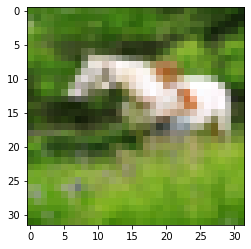

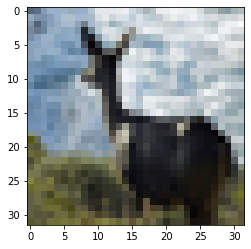

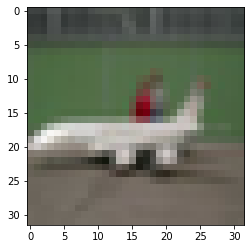

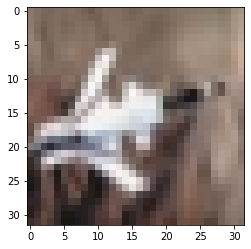

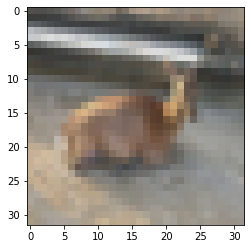

2024-06-22 16:13:26.231496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [11]:
# Define the objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate),metrics=['acc'])
    callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=10),
    
]
    history = model.fit(train_dataset,epochs=50,validation_data=validation_dataset,callbacks=callbacks_list)

    val_accuracy = max(history.history['val_acc'])
    return val_accuracy

In [12]:
# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best learning rate found
print('Best learning rate: ', study.best_params['learning_rate'])

[I 2024-06-22 16:13:26,255] A new study created in memory with name: no-name-c1956506-4e73-4db0-827e-b498d41db059


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.0975 - loss: 2.3279 - val_acc: 0.1030 - val_loss: 2.3042
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1003 - loss: 2.3198 - val_acc: 0.1028 - val_loss: 2.3034
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.0992 - loss: 2.3161 - val_acc: 0.1024 - val_loss: 2.3030
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.0985 - loss: 2.3116 - val_acc: 0.0993 - val_loss: 2.3027
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.0989 - loss: 2.3097 - val_acc: 0.0946 - val_loss: 2.3026
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.0980 - loss: 2.3087 - val_acc: 0.0904 - val_loss: 2.3024
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.0962 - loss: 2.3084 - val_acc: 0.0874 - val_loss: 2.3023
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.1004 - loss: 2.3072 - val_acc: 0.0849 - val_loss: 2.3023
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:18:37,847] Trial 0 finished with value: 0.12039999663829803 and parameters: {'learning_rate': 4.3497107433277146e-05}. Best is trial 0 with value: 0.12039999663829803.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.1025 - loss: 2.3060 - val_acc: 0.0961 - val_loss: 2.3020
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.0999 - loss: 2.3044 - val_acc: 0.0934 - val_loss: 2.3017
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1020 - loss: 2.3028 - val_acc: 0.0940 - val_loss: 2.3014
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1051 - loss: 2.3020 - val_acc: 0.0975 - val_loss: 2.3011
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1043 - loss: 2.3015 - val_acc: 0.1047 - val_loss: 2.3009
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1030 - loss: 2.3013 - val_acc: 0.1126 - val_loss: 2.3005
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1036 - loss: 2.3001 - val_acc: 0.1198 - val_loss: 2.3002
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1022 - loss: 2.2996 - val_acc: 0.1230 - val_loss: 2.2999
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:23:47,053] Trial 1 finished with value: 0.21850000321865082 and parameters: {'learning_rate': 0.00011106047723808934}. Best is trial 1 with value: 0.21850000321865082.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.1024 - loss: 2.3046 - val_acc: 0.0998 - val_loss: 2.3012
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1037 - loss: 2.3008 - val_acc: 0.1072 - val_loss: 2.2991
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1057 - loss: 2.2981 - val_acc: 0.1173 - val_loss: 2.2957
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1158 - loss: 2.2917 - val_acc: 0.1233 - val_loss: 2.2876
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1293 - loss: 2.2796 - val_acc: 0.1633 - val_loss: 2.2650
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1527 - loss: 2.2442 - val_acc: 0.1949 - val_loss: 2.2132
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.1825 - loss: 2.1876 - val_acc: 0.2152 - val_loss: 2.1597
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.2009 - loss: 2.1438 - val_acc: 0.2245 - val_loss: 2.1213
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:28:42,155] Trial 2 finished with value: 0.49869999289512634 and parameters: {'learning_rate': 0.0010700749621883373}. Best is trial 2 with value: 0.49869999289512634.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0981 - loss: 2.3082 - val_acc: 0.1002 - val_loss: 2.3015
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.1013 - loss: 2.3018 - val_acc: 0.1159 - val_loss: 2.3003
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.1108 - loss: 2.2979 - val_acc: 0.1413 - val_loss: 2.2979
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1139 - loss: 2.2923 - val_acc: 0.1588 - val_loss: 2.2915
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1264 - loss: 2.2800 - val_acc: 0.1791 - val_loss: 2.2738
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1383 - loss: 2.2560 - val_acc: 0.2013 - val_loss: 2.2388
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1756 - loss: 2.2138 - val_acc: 0.2064 - val_loss: 2.1899
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.1919 - loss: 2.1680 - val_acc: 0.2150 - val_loss: 2.1401
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:33:41,601] Trial 3 finished with value: 0.4422000050544739 and parameters: {'learning_rate': 0.000721820847679201}. Best is trial 2 with value: 0.49869999289512634.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.1014 - loss: 2.3111 - val_acc: 0.0948 - val_loss: 2.3029
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.1003 - loss: 2.3057 - val_acc: 0.1035 - val_loss: 2.3021
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.1048 - loss: 2.3039 - val_acc: 0.1077 - val_loss: 2.3013
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.1057 - loss: 2.3019 - val_acc: 0.1133 - val_loss: 2.3004
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1093 - loss: 2.3004 - val_acc: 0.1204 - val_loss: 2.2996
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1103 - loss: 2.2995 - val_acc: 0.1267 - val_loss: 2.2987
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1169 - loss: 2.2982 - val_acc: 0.1287 - val_loss: 2.2975
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1185 - loss: 2.2968 - val_acc: 0.1319 - val_loss: 2.2962
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:38:30,475] Trial 4 finished with value: 0.31459999084472656 and parameters: {'learning_rate': 0.00026294627938174}. Best is trial 2 with value: 0.49869999289512634.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.1152 - loss: 2.2905 - val_acc: 0.2207 - val_loss: 2.1752
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.2074 - loss: 2.1225 - val_acc: 0.2632 - val_loss: 2.0210
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.2535 - loss: 2.0184 - val_acc: 0.2997 - val_loss: 1.9303
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.2954 - loss: 1.9253 - val_acc: 0.3276 - val_loss: 1.8358
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.3323 - loss: 1.8245 - val_acc: 0.3753 - val_loss: 1.7272
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3567 - loss: 1.7559 - val_acc: 0.3840 - val_loss: 1.6786
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3796 - loss: 1.6955 - val_acc: 0.4112 - val_loss: 1.6165
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.3999 - loss: 1.6422 - val_acc: 0.4353 - val_loss: 1.5495
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:43:44,949] Trial 5 finished with value: 0.6657000184059143 and parameters: {'learning_rate': 0.004167542399883081}. Best is trial 5 with value: 0.6657000184059143.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.1079 - loss: 2.3021 - val_acc: 0.2038 - val_loss: 2.2904
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1497 - loss: 2.2744 - val_acc: 0.2037 - val_loss: 2.1213
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2013 - loss: 2.1040 - val_acc: 0.2479 - val_loss: 2.0263
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.2381 - loss: 2.0344 - val_acc: 0.2813 - val_loss: 1.9606
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2766 - loss: 1.9660 - val_acc: 0.3120 - val_loss: 1.9133
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2958 - loss: 1.9067 - val_acc: 0.3479 - val_loss: 1.8129
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3242 - loss: 1.8319 - val_acc: 0.3678 - val_loss: 1.7558
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3442 - loss: 1.7742 - val_acc: 0.3853 - val_loss: 1.6897
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:48:40,438] Trial 6 finished with value: 0.6495000123977661 and parameters: {'learning_rate': 0.002737999511966844}. Best is trial 5 with value: 0.6657000184059143.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.0989 - loss: 2.3124 - val_acc: 0.0910 - val_loss: 2.3039
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.0999 - loss: 2.3115 - val_acc: 0.0914 - val_loss: 2.3037
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1003 - loss: 2.3117 - val_acc: 0.0919 - val_loss: 2.3036
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.0972 - loss: 2.3109 - val_acc: 0.0917 - val_loss: 2.3034
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1004 - loss: 2.3094 - val_acc: 0.0920 - val_loss: 2.3033
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.0982 - loss: 2.3105 - val_acc: 0.0919 - val_loss: 2.3032
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.0992 - loss: 2.3100 - val_acc: 0.0916 - val_loss: 2.3031
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1027 - loss: 2.3078 - val_acc: 0.0913 - val_loss: 2.3030
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:53:30,365] Trial 7 finished with value: 0.10589999705553055 and parameters: {'learning_rate': 1.0429417602826981e-05}. Best is trial 5 with value: 0.6657000184059143.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.1199 - loss: 2.2901 - val_acc: 0.2187 - val_loss: 2.0809
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.2400 - loss: 2.0418 - val_acc: 0.3248 - val_loss: 1.8531
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3211 - loss: 1.8502 - val_acc: 0.3822 - val_loss: 1.6959
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3662 - loss: 1.7212 - val_acc: 0.4216 - val_loss: 1.5845
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3988 - loss: 1.6284 - val_acc: 0.4602 - val_loss: 1.4973
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.4328 - loss: 1.5408 - val_acc: 0.4712 - val_loss: 1.4550
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.4576 - loss: 1.4816 - val_acc: 0.4951 - val_loss: 1.3757
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.4790 - loss: 1.4279 - val_acc: 0.5256 - val_loss: 1.3206
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━

[I 2024-06-22 16:58:36,347] Trial 8 finished with value: 0.7353000044822693 and parameters: {'learning_rate': 0.008542739901721545}. Best is trial 8 with value: 0.7353000044822693.


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.1075 - loss: 2.2939 - val_acc: 0.2222 - val_loss: 2.1954
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.2024 - loss: 2.1492 - val_acc: 0.2512 - val_loss: 2.0323
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.2349 - loss: 2.0373 - val_acc: 0.2945 - val_loss: 1.9325
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.2856 - loss: 1.9308 - val_acc: 0.3306 - val_loss: 1.8272
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.3251 - loss: 1.8210 - val_acc: 0.3682 - val_loss: 1.7280
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.3582 - loss: 1.7401 - val_acc: 0.3735 - val_loss: 1.7260
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3826 - loss: 1.6650 - val_acc: 0.4330 - val_loss: 1.5495
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.4035 - loss: 1.6079 - val_acc: 0.4416 - val_loss: 1.5256
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

[I 2024-06-22 17:03:40,717] Trial 9 finished with value: 0.6721000075340271 and parameters: {'learning_rate': 0.003989598193432969}. Best is trial 8 with value: 0.7353000044822693.


Best learning rate:  0.008542739901721545
